# week4 Map and Plot

**about this assignment**

In the first part, I map the type of builidings in Jakarta, Indonesia beucase I want to know the hospital locations and residential locations in the area. In the second part, I created graphs of disaster trends in top 4 disaster-prone countries which are China, United States, Philippines, and India based on what I learned from office hours. 


## Mapping

### Import the Libraries 

In [265]:
import osmnx as ox

import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

### Define Address from the Open Street Map

In [266]:
address = 'Jakarta, Indonesia'

tags = {'building':True}


In [267]:
%%time

osm = ox.geometries_from_address(address,
                                 tags=tags,
                                 dist=dist)

CPU times: user 489 ms, sys: 10.1 ms, total: 499 ms
Wall time: 10.9 s


### Understand the Data

In [268]:
osm.shape

(1883, 107)

In [269]:
list(osm)

['unique_id',
 'osmid',
 'element_type',
 'geometry',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'building',
 'name',
 'nodes',
 'backup_generator',
 'building:condition',
 'building:floor',
 'building:levels',
 'building:roof',
 'building:structure',
 'building:walls',
 'source',
 'access:roof',
 'addr:full',
 'amenity',
 'capacity:persons',
 'government',
 'alt_name:en',
 'name:vi',
 'designation',
 'int_name',
 'office',
 'layer',
 'name:en',
 'addr:housename',
 'denomination',
 'religion',
 'wikidata',
 'wikipedia:en',
 'brand',
 'brand:wikidata',
 'brand:wikipedia',
 'building:use',
 'architect',
 'official_name',
 'tourism',
 'atm',
 'evacuation_center',
 'country',
 'diplomatic',
 'target',
 'admin_level',
 'official_name:en',
 'official_name:id',
 'operator:type',
 'school:type_idn',
 'internet_access',
 'internet_access:fee',
 'smoking',
 'wheelchair',
 'website',
 'wikipedia',
 'leisure',
 'landuse',
 'military',
 'name:nl',
 'height',
 'address',
 

In [270]:
osm.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1883 entries, 0 to 1882
Data columns (total 107 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   unique_id              1883 non-null   object  
 1   osmid                  1883 non-null   int64   
 2   element_type           1883 non-null   object  
 3   geometry               1883 non-null   geometry
 4   addr:city              211 non-null    object  
 5   addr:housenumber       38 non-null     object  
 6   addr:postcode          50 non-null     object  
 7   addr:street            57 non-null     object  
 8   building               1883 non-null   object  
 9   name                   171 non-null    object  
 10  nodes                  1882 non-null   object  
 11  backup_generator       133 non-null    object  
 12  building:condition     161 non-null    object  
 13  building:floor         161 non-null    object  
 14  building:levels        215 non-

### Organize Data

#### Eliminating Some Columns

In [271]:
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.sample(10)

,geometry,building
194,"POLYGON ((106.82410 -6.18205, 106.82440 -6.182...",yes
1688,"POLYGON ((106.81826 -6.17125, 106.81834 -6.171...",yes
1482,"POLYGON ((106.81997 -6.17876, 106.82004 -6.178...",yes
213,"POLYGON ((106.82684 -6.18335, 106.82695 -6.183...",office
1475,"POLYGON ((106.81869 -6.18339, 106.81884 -6.183...",yes
400,"POLYGON ((106.83271 -6.18429, 106.83272 -6.184...",yes
1748,"POLYGON ((106.83010 -6.16707, 106.83014 -6.167...",yes
3,"POLYGON ((106.82393 -6.17041, 106.82404 -6.170...",government_office
32,"POLYGON ((106.82921 -6.18320, 106.82934 -6.183...",yes
1157,"POLYGON ((106.81833 -6.16791, 106.81840 -6.167...",yes


#### Count Each Building Type

In [272]:
osm.building.value_counts()

yes                       1610
government_office          105
school                      38
commercial                  26
bank                        22
mosque                      15
power_substation            12
office                       7
train_station                6
embassy                      6
governor_office              5
church                       4
townhall                     4
residential                  4
hospital                     2
pumping_station              2
roof                         2
university                   2
police                       2
museum                       1
power_plant                  1
community_group_office       1
clinic                       1
subdistrict_office           1
parking                      1
public                       1
apartments                   1
village_office               1
Name: building, dtype: int64

#### Change "yes" to "unassigned"

In [273]:
osm.loc[osm['building']=='yes','building'] = 'unassigned'
osm.sample(10)

,geometry,building
1523,"POLYGON ((106.83576 -6.17936, 106.83582 -6.179...",unassigned
511,"POLYGON ((106.83565 -6.17850, 106.83571 -6.178...",unassigned
1239,"POLYGON ((106.81971 -6.17322, 106.81979 -6.173...",unassigned
1399,"POLYGON ((106.82018 -6.17344, 106.82022 -6.173...",unassigned
1080,"POLYGON ((106.82047 -6.17316, 106.82059 -6.173...",unassigned
948,"POLYGON ((106.82623 -6.16973, 106.82662 -6.169...",unassigned
405,"POLYGON ((106.83507 -6.18139, 106.83530 -6.181...",unassigned
750,"POLYGON ((106.83329 -6.17687, 106.83339 -6.176...",unassigned
817,"POLYGON ((106.83354 -6.17736, 106.83359 -6.177...",unassigned
1877,"POLYGON ((106.83305 -6.17497, 106.83325 -6.175...",unassigned


#### List the Count of Each Building Type in the Dataframe

In [274]:
osm_building_counts = osm.building.value_counts().reset_index()
osm_building_counts

,index,building
0,unassigned,1610
1,government_office,105
2,school,38
3,commercial,26
4,bank,22
5,mosque,15
6,power_substation,12
7,office,7
8,embassy,6
9,train_station,6


#### Rename the Column Title

In [275]:
osm_building_counts = osm_building_counts.rename(columns={'index':'building_type','building':'count'})
osm_building_counts

,building_type,count
0,unassigned,1610
1,government_office,105
2,school,38
3,commercial,26
4,bank,22
5,mosque,15
6,power_substation,12
7,office,7
8,embassy,6
9,train_station,6


### Map the Builidngs

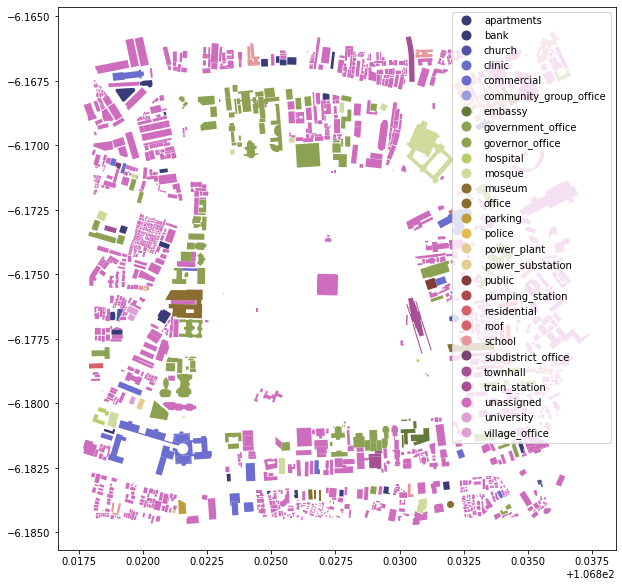

In [276]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20b',
         legend=True)

### Add a Basemap

In [277]:
osm_web_mercator = osm.to_crs(epsg=3857)

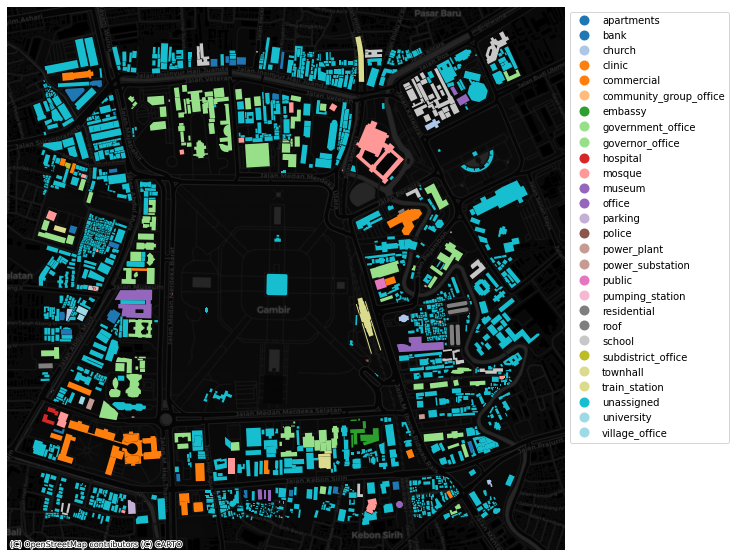

In [278]:
fig, ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                        column='building',
                        cmap='tab20',
                        legend=True,
                        legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.DarkMatter)

**About the Map**

First, I was surprised by the limited number of hospitals and clinics.
However, after checking the builidngs on the Google Map, I noticed that there were more of them, compared to the map. Rest of the hospitals and clinics are in "unassigned" area. Also, there is a grey lines which indicates river. Thus, I wonder if those rivers has also been a risk of the flood in Jakarta.

## Plots

## Import Libraries and Data

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

In [280]:
india = pd.read_csv('india_disaster.csv')
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           644 non-null    object 
 1   Year                             644 non-null    int64  
 2   Seq                              644 non-null    int64  
 3   Disaster Group                   644 non-null    object 
 4   Disaster Subgroup                644 non-null    object 
 5   Disaster Type                    644 non-null    object 
 6   Disaster Subtype                 523 non-null    object 
 7   Disaster Subsubtype              52 non-null     object 
 8   Event Name                       81 non-null     object 
 9   Entry Criteria                   639 non-null    object 
 10  Country                          644 non-null    object 
 11  ISO                              644 non-null    object 
 12  Region                

### Create a Plot for Each Country

#### India

In [281]:
india.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Earthquake,1
1,1970,Flood,2
2,1970,Storm,1
3,1971,Flood,3
4,1971,Storm,2
...,...,...,...
215,2019,Flood,5
216,2019,Storm,5
217,2020,Flood,4
218,2020,Landslide,2


In [282]:
df1 = india.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df1.head()

,Year,Disaster Type,count
0,1970,Earthquake,1
1,1970,Flood,2
2,1970,Storm,1
3,1971,Flood,3
4,1971,Storm,2


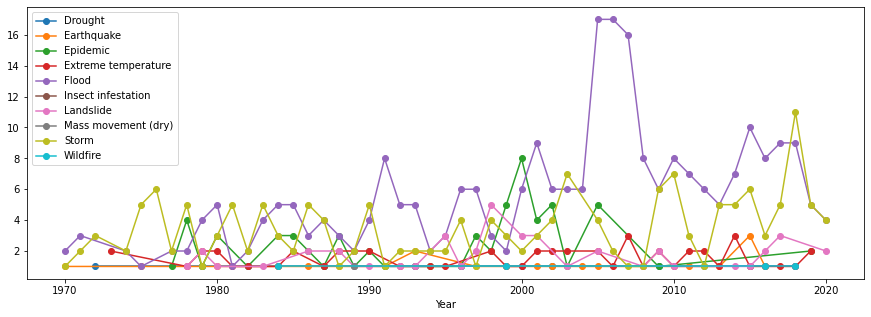

In [283]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df1.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

#### Philippines

In [284]:
philippines = pd.read_csv('philippines_disaster.csv')
philippines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           602 non-null    object 
 1   Year                             602 non-null    int64  
 2   Seq                              602 non-null    int64  
 3   Disaster Group                   602 non-null    object 
 4   Disaster Subgroup                602 non-null    object 
 5   Disaster Type                    602 non-null    object 
 6   Disaster Subtype                 530 non-null    object 
 7   Disaster Subsubtype              5 non-null      object 
 8   Event Name                       364 non-null    object 
 9   Entry Criteria                   598 non-null    object 
 10  Country                          602 non-null    object 
 11  ISO                              602 non-null    object 
 12  Region                

In [285]:
philippines.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Earthquake,1
1,1970,Storm,8
2,1971,Storm,4
3,1972,Flood,1
4,1972,Storm,3
...,...,...,...
175,2019,Storm,7
176,2020,Earthquake,1
177,2020,Landslide,1
178,2020,Storm,6


In [286]:
df2 = philippines.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df2.head()

,Year,Disaster Type,count
0,1970,Earthquake,1
1,1970,Storm,8
2,1971,Storm,4
3,1972,Flood,1
4,1972,Storm,3


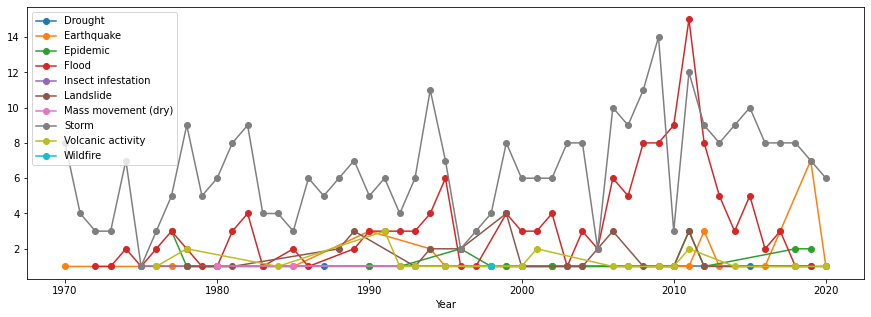

In [287]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df2.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

#### China

In [288]:
china = pd.read_csv('china_disaster.csv')
china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           895 non-null    object 
 1   Year                             895 non-null    int64  
 2   Seq                              895 non-null    int64  
 3   Disaster Group                   895 non-null    object 
 4   Disaster Subgroup                895 non-null    object 
 5   Disaster Type                    895 non-null    object 
 6   Disaster Subtype                 771 non-null    object 
 7   Disaster Subsubtype              102 non-null    object 
 8   Event Name                       164 non-null    object 
 9   Entry Criteria                   884 non-null    object 
 10  Country                          895 non-null    object 
 11  ISO                              895 non-null    object 
 12  Region                

In [289]:
china.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Earthquake,1
1,1970,Storm,1
2,1973,Earthquake,1
3,1974,Earthquake,1
4,1975,Earthquake,1
...,...,...,...
213,2020,Earthquake,1
214,2020,Flood,5
215,2020,Landslide,1
216,2020,Storm,4


In [290]:
df3 = china.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df3.head()

,Year,Disaster Type,count
0,1970,Earthquake,1
1,1970,Storm,1
2,1973,Earthquake,1
3,1974,Earthquake,1
4,1975,Earthquake,1


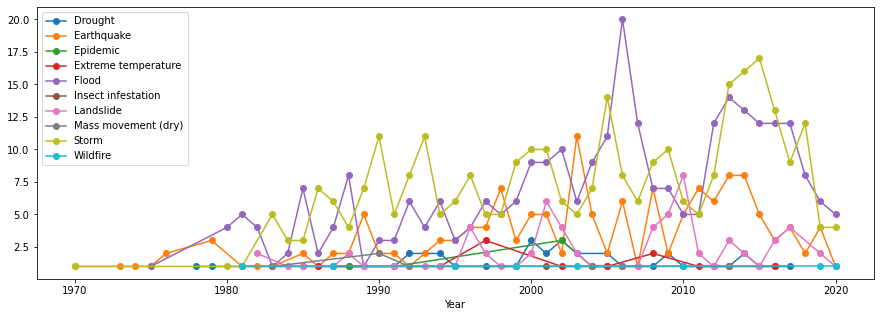

In [291]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df3.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

#### United States

In [292]:
us = pd.read_csv('US_disaster.csv')
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           915 non-null    object 
 1   Year                             915 non-null    int64  
 2   Seq                              915 non-null    int64  
 3   Disaster Group                   915 non-null    object 
 4   Disaster Subgroup                915 non-null    object 
 5   Disaster Type                    915 non-null    object 
 6   Disaster Subtype                 728 non-null    object 
 7   Disaster Subsubtype              340 non-null    object 
 8   Event Name                       116 non-null    object 
 9   Entry Criteria                   913 non-null    object 
 10  Country                          915 non-null    object 
 11  ISO                              915 non-null    object 
 12  Region                

In [293]:
us.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index()

,Year,Disaster Type,Dis No
0,1970,Storm,2
1,1970,Wildfire,1
2,1971,Earthquake,1
3,1971,Storm,2
4,1972,Extreme temperature,1
...,...,...,...
186,2019,Wildfire,2
187,2020,Drought,1
188,2020,Flood,2
189,2020,Storm,17


In [294]:
df4 = us.groupby(['Year','Disaster Type'])['Dis No'].count().reset_index(name='count')
df4.head()

,Year,Disaster Type,count
0,1970,Storm,2
1,1970,Wildfire,1
2,1971,Earthquake,1
3,1971,Storm,2
4,1972,Extreme temperature,1


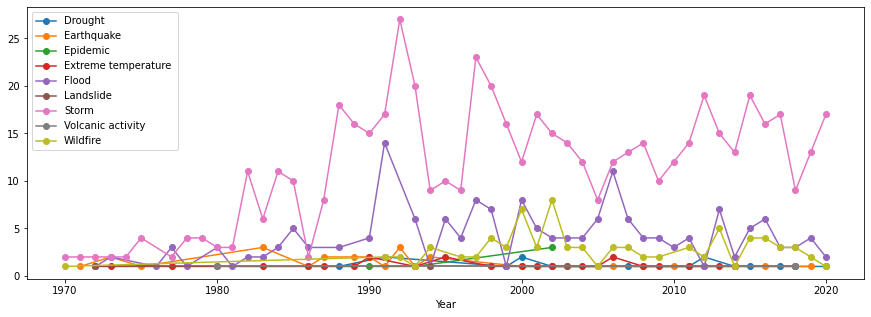

In [295]:
fig, ax = plt.subplots(figsize=(15,5))

for type, subdf in df4.groupby('Disaster Type'):
    subdf.plot(x='Year',y='count',ax=ax,label=type, marker='o')

### Create Subplots 

Text(0.5, 1.0, 'Disaster Trend in United States')

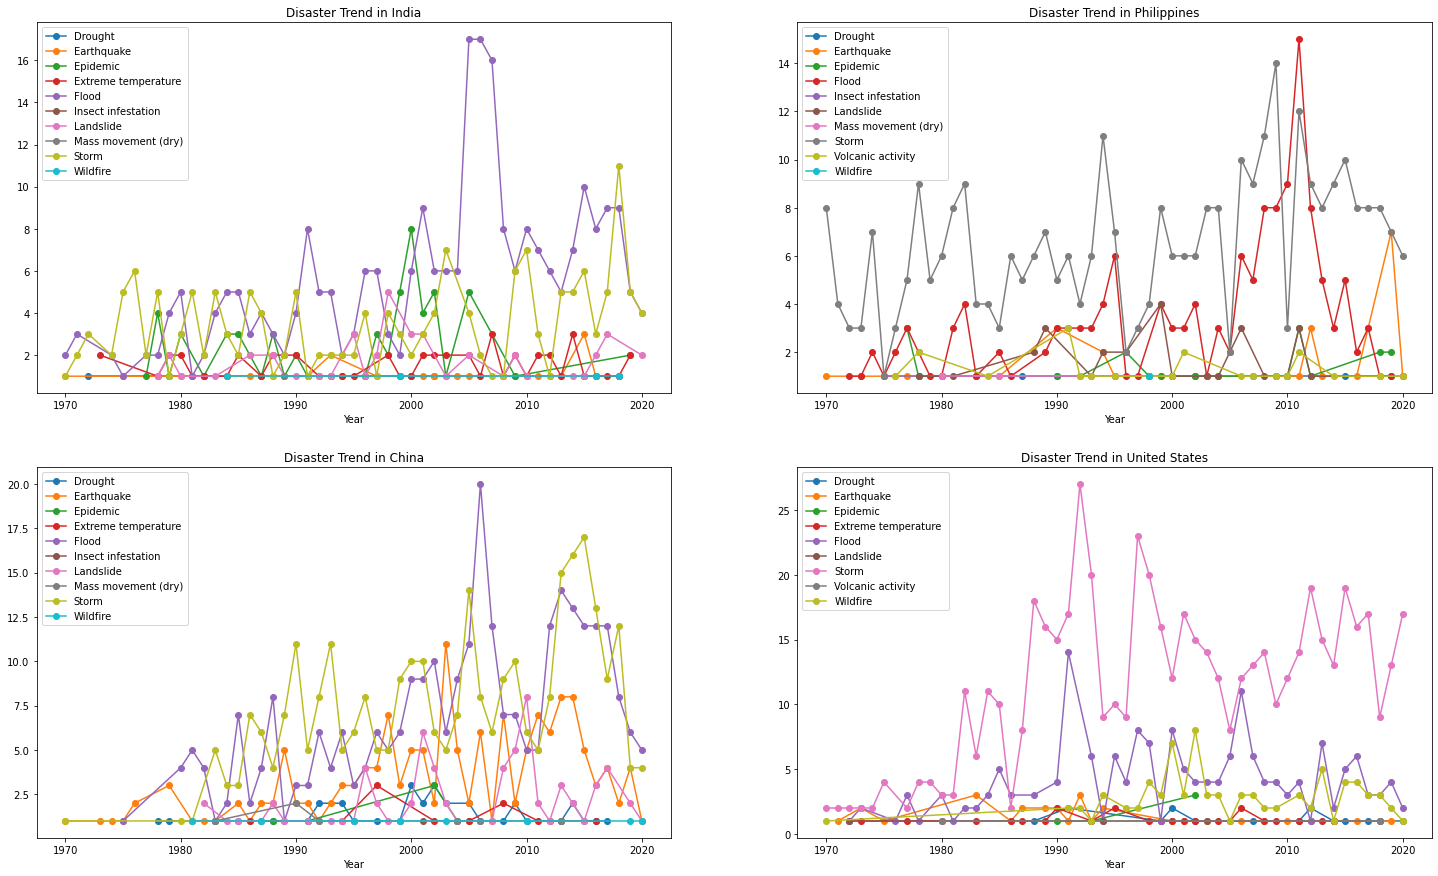

In [296]:
fig, ax = plt.subplots(2,2,figsize=(25,15))

for type, subdf in df1.groupby('Disaster Type'):
    subdf.plot(ax=ax[0,0], x='Year',y='count', label=type, marker='o')
ax[0,0].set_title('Disaster Trend in India')
    
for type, subdf in df2.groupby('Disaster Type'):
    subdf.plot(ax=ax[0,1], x='Year',y='count', label=type, marker='o')
ax[0,1].set_title('Disaster Trend in Philippines')
    
for type, subdf in df3.groupby('Disaster Type'):
    subdf.plot(ax=ax[1,0], x='Year',y='count', label=type, marker='o')
ax[1,0].set_title('Disaster Trend in China')

for type, subdf in df4.groupby('Disaster Type'):
    subdf.plot(ax=ax[1,1], x='Year',y='count', label=type, marker='o')
ax[1,1].set_title('Disaster Trend in United States')

**About the Plots**

Regardless of the difference in locations, all of these four countries are experiencing the increase in climate disasters, like storm and flood. Therefore, these plots prove the increase in climate related disasters in the world. 

**Next Step**

I was not able to figure out how to unify the color of lines of each plot, so I hope to learn the method next week. 